In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

import pandas as pd
import numpy as np


import random
np.random.seed(1235)
random.seed(1235)

house = pd.read_csv('housing.csv')

- 'longitude': 위도
- 'latitude': 경도
- 'housing_median_age': 건축물 중위연령
- 'total_rooms': 방의 총 개수
- 'total_bedrooms': 침실 총 개수
- 'population': 인구
- 'households': 가구수
- 'median_income': 중위소득
- 'median_house_value': 주택 중위가격
- 'ocean_proximity': 해안 접근도

In [2]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
house.shape

(20640, 10)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [112]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 카테고리 변수 라벨링

In [113]:
house["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le = LabelEncoder()
le = le.fit(house['ocean_proximity'])
house['ocean_proximity'] = le.transform(house['ocean_proximity'])
house['ocean_proximity'] = house['ocean_proximity'].astype("category")

In [116]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


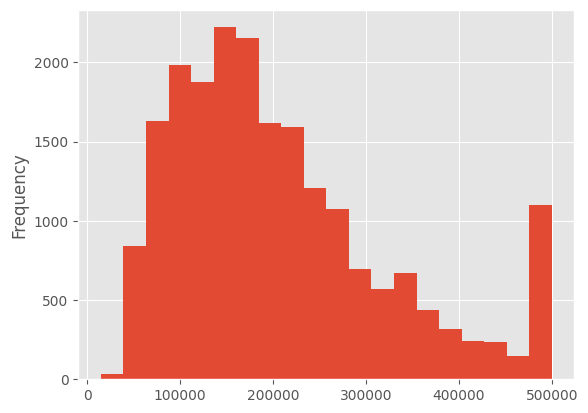

In [117]:
house['median_house_value'].plot.hist(bins = 20)
plt.show() #로그화 필요

## test와 train 분할

In [118]:
random.seed(1)
from sklearn.model_selection import train_test_split

In [119]:
# features와 target을 나누기
X = house.drop(columns=['median_house_value'])  # 특성(features) 열
y = house['median_house_value']  # 타겟(target) 열

# train과 test 셋으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분할된 train과 test 셋의 크기 확인
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 16512
Test set size: 4128


In [120]:
train_df_le = house[~house["median_house_value"].isnull()]
test_df_le = house[house["median_house_value"].isnull()]

## LightGBM으로 데이터 읽기

In [121]:
import lightgbm as lgb

In [122]:
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [123]:
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [124]:
train_X = train_df_le.drop(["median_house_value"], axis=1)
train_Y = train_df_le["median_house_value"]

In [125]:
from sklearn.metrics import mean_squared_error

In [126]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    print(X_train)
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(np.log(y_valid), np.log(y_pred)))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6880     -118.09     34.07                45.0        726.0           146.0   
6881     -118.09     34.07                31.0       1054.0           252.0   
6882     -118.09     34.06                30.0       1980.0           552.0   
6883     -118.09     34.06                38.0       3230.0           840.0   
6884     -118.08     34.04                20.0       5841.0          1146.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [127]:
sum(rmses)/len(rmses)

0.318010369400198

## 목적 변수 전처리 - 로그화

In [128]:
np.log(house['median_house_value'])

0        13.022764
1        12.789684
2        12.771671
3        12.740517
4        12.743151
           ...    
20635    11.265745
20636    11.252859
20637    11.432799
20638    11.346871
20639    11.400876
Name: median_house_value, Length: 20640, dtype: float64

<Axes: ylabel='Frequency'>

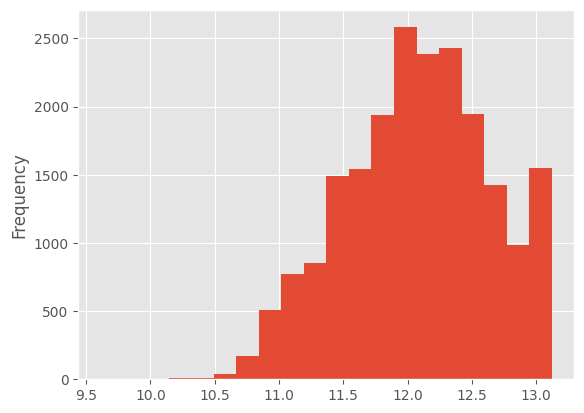

In [129]:
np.log(house['median_house_value']).plot.hist(bins=20)

In [130]:
pd.options.mode.chained_assignment = None
train_df_le["median_house_value_log"] = np.log(train_df_le["median_house_value"])

In [131]:
train_X = train_df_le.drop(["median_house_value","median_house_value_log"], axis=1)
train_Y = train_df_le["median_house_value_log"]

In [132]:
import warnings
warnings.filterwarnings("ignore")

models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.177105
[20]	valid_0's l2: 0.148305
[30]	valid_0's l2: 0.13703
[40]	valid_0's l2: 0.133683
[50]	valid_0's l2: 0.130805
[60]	valid_0's l2: 0.129102
[70]	valid_0's l2: 0.128682
[80]	valid_0's l2: 0.126369
[90]	valid_0's l2: 0.12531
[100]	valid_0's l2: 0.124654
Did not meet early stopping. Best iteration is:
[94]	valid_0's l2: 0.124482
0.35281976425815553
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.107613
[20]	valid_0's l2: 0.0851687
[30]	valid_0's l2: 0.0810526
[40]	valid_0's l2: 0.0781385
[50]	valid_0's l2: 0.0762139
[60]	valid_0's l2: 0.0761592
[70]	valid_0's l2: 0.0764343
Early stopping, best iteration is:
[55]	valid_0's l2: 0.0759788
0.27564511558178456
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.154067
[20]	valid_0's l2: 0.12318
[30]	valid_0's l2: 0.118136
[40]	valid_0's l2: 0.113012
[50]	valid_0's l2: 0.108943
[60]	valid_0's l2

In [133]:
sum(rmses)/len(rmses)

0.31609666346625015

## 설명변수 이상치 제외

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

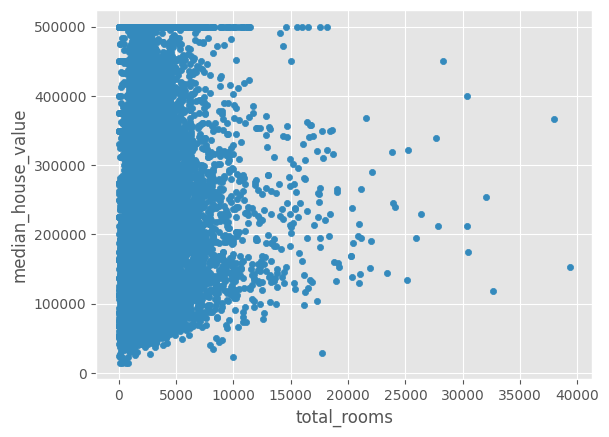

In [8]:
house.plot.scatter(x='total_rooms', y='median_house_value') #20000이상은 이상치

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

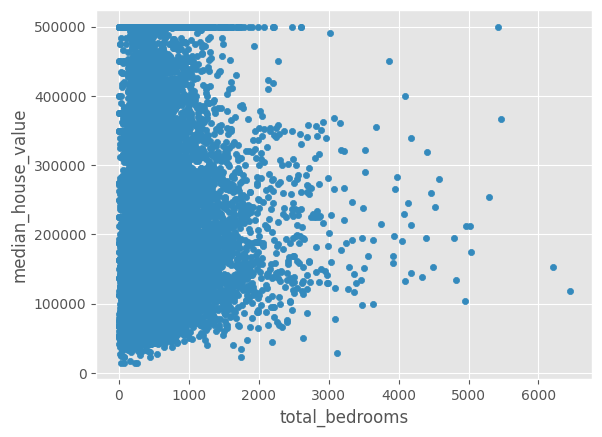

In [6]:
house.plot.scatter(x= 'total_bedrooms', y= 'median_house_value') #4000

<Axes: xlabel='population', ylabel='median_house_value'>

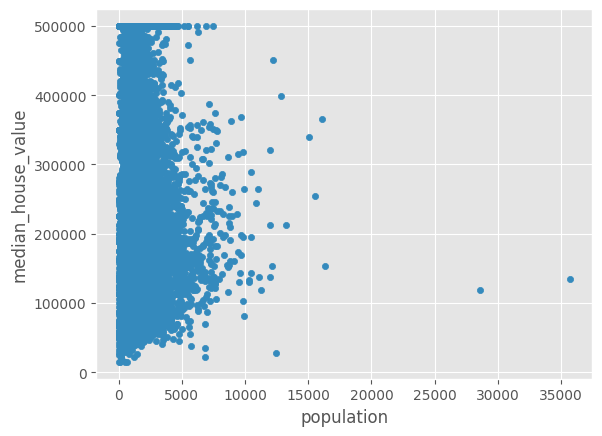

In [104]:
house.plot.scatter(x= 'population', y= 'median_house_value') #15000이상

<Axes: xlabel='households', ylabel='median_house_value'>

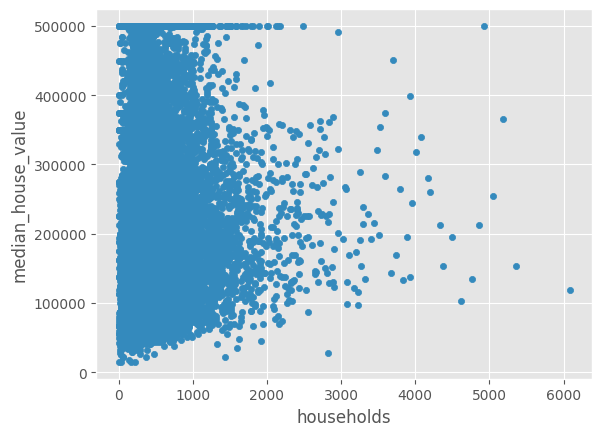

In [105]:
house.plot.scatter(x= 'households', y= 'median_house_value') #4000이상

<Axes: xlabel='median_income', ylabel='median_house_value'>

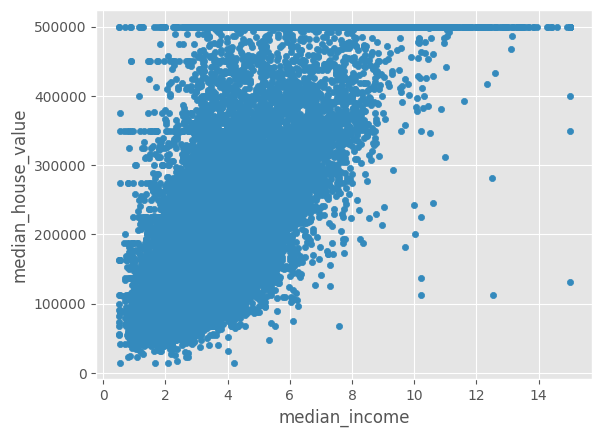

In [106]:
house.plot.scatter(x= 'median_income', y= 'median_house_value') #income이 12이상, value가 500000이하...?

In [136]:
hosue = house[(house['total_rooms'] < 20000) | (house['median_house_value'].isnull())]
hosue = house[(house['total_bedrooms'] < 4000) | (house['median_house_value'].isnull())]
hosue = house[(house['population'] < 15000) | (house['median_house_value'].isnull())]
hosue = house[(house['households'] < 4000) | (house['median_house_value'].isnull())]
hosue = house[(house['median_income'] < 12) | (house['median_house_value'] < 500000)]

In [139]:
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [140]:
train_df_le = hosue[~house["median_house_value"].isnull()] 
test_df_le = house[house["median_house_value"].isnull()] 

train_df_le["median_house_value_log"] = np.log(train_df_le["median_house_value"])
train_X = train_df_le.drop(["median_house_value","median_house_value_log"], axis=1)
train_Y = train_df_le["median_house_value_log"]

In [141]:
models = []
rmses = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    tmp_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(tmp_rmse)    
              
    models.append(model_lgb)    
    rmses.append(tmp_rmse)
    oof[val_index] = y_pred 

Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.177844
[20]	valid_0's l2: 0.145696
[30]	valid_0's l2: 0.13602
[40]	valid_0's l2: 0.130235
[50]	valid_0's l2: 0.127598
[60]	valid_0's l2: 0.123452
[70]	valid_0's l2: 0.123216
[80]	valid_0's l2: 0.122564
[90]	valid_0's l2: 0.12233
[100]	valid_0's l2: 0.121849
Did not meet early stopping. Best iteration is:
[97]	valid_0's l2: 0.12176
0.34894103673169424
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.106925
[20]	valid_0's l2: 0.0858766
[30]	valid_0's l2: 0.0807662
[40]	valid_0's l2: 0.0774258
[50]	valid_0's l2: 0.0769209
[60]	valid_0's l2: 0.0760086
[70]	valid_0's l2: 0.0756571
[80]	valid_0's l2: 0.0759186
[90]	valid_0's l2: 0.0756795
Early stopping, best iteration is:
[74]	valid_0's l2: 0.075616
0.2749835709850599
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.153957
[20]	valid_0's l2: 0.125054
[30]	valid_0's l2: 0.111395
[40]	valid_0's l2

In [142]:
sum(rmses)/len(rmses)

0.31261909973962676